## Source and citation

- This notebook is a part of the `pytheos` package ([Github](http://github.com/SHDShim/pytheos)). 

- __[Citation]__ S.-H. Shim (2017) Pytheos - python equations of state tools. doi:

In [2]:
%matplotlib inline
# %matplotlib notebook # for interactive

For high dpi displays.

In [3]:
%config InlineBackend.figure_format = 'retina'

# 0. General note

This notebook shows how to calculate thermal pressure and associated terms in the constant q approach.

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import uncertainties as uct
from uncertainties import unumpy as unp
import pandas as pd
import pytheos as eos

# 1. Calculate Debye energy with uncertainties

Assign uncertainties to `x`.  

In [20]:
x = unp.uarray(np.linspace(0.01,15.,20), np.ones(20)*0.5) # 0.1,7.25

In [21]:
energy = eos.debye_E(x)

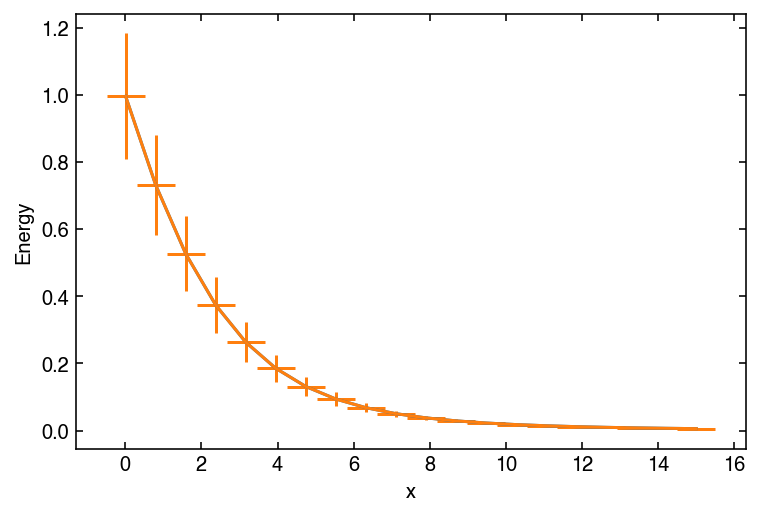

In [23]:
plt.plot(unp.nominal_values(x), unp.nominal_values(energy))
plt.xlabel('x'); plt.ylabel('Energy')
plt.errorbar(unp.nominal_values(x), unp.nominal_values(energy), 
             xerr = unp.std_devs(x), yerr = unp.std_devs(energy));

# 2. Calculate Gruneisen parameter

You may get some help on how to call the function using `help()` command.  `constq_grun` calculates Gruneisen $(\gamma)$ parameter with error propagation based on the following relation:

$$\dfrac{\gamma}{\gamma_0} = \left( \dfrac{V}{V_0} \right)^q$$

where $\gamma_0$ is the Gruneisen parameter at reference conditions and $V$ is the volume.  $q$ is the logarithmic volume dependence of Gruneisen parameter.

In [31]:
help(eos.constq_grun)

Help on function constq_grun in module pytheos.eqn_therm_constq:

constq_grun(v, v0, gamma0, q)
    calculate Gruneisen parameter for constant q
    
    :param v: unit-cell volume in A^3
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Grunseinen parameter
    :return: Gruneisen parameter at a given volume



Calculate Gruneisen parameter without error bar.

In [32]:
v0 = 162.3
v = np.linspace(v0, v0*0.8, 20)
grun = eos.constq_grun(v, v0, 1.5, 2)

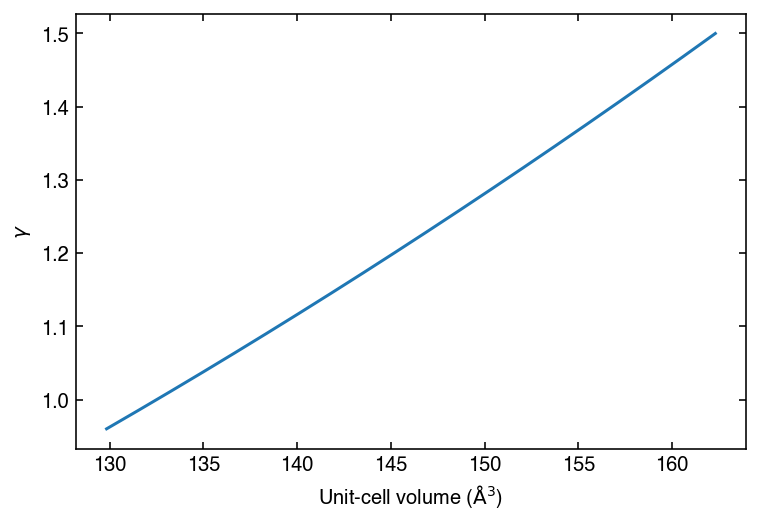

In [81]:
plt.plot(v, grun)
plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('$\gamma$');

The cell below shows how to do error propagation.

In [51]:
s_v = np.random.uniform(0., 0.1, 20)
v_u = unp.uarray(v, s_v)
gamma = eos.constq_grun(v_u, uct.ufloat(v0, 0.01), uct.ufloat(1.5, 0.1), uct.ufloat(2.,0.5))
gamma

array([1.5+/-0.10000722965288955, 1.4685872576177283+/-0.09822501635719612,
       1.4375069252077564+/-0.09705912368520847,
       1.406759002770083+/-0.09646763094391772,
       1.3763434903047091+/-0.09642609829410959,
       1.3462603878116342+/-0.09685104446565784,
       1.3165096952908588+/-0.09771323351875937,
       1.287091412742382+/-0.09895196459157184,
       1.2580055401662051+/-0.10047642594998044,
       1.2292520775623266+/-0.10226930941935386,
       1.200831024930748+/-0.10425324779281361,
       1.1727423822714682+/-0.10640164603878594,
       1.1449861495844877+/-0.10864284523056214,
       1.1175623268698058+/-0.11096818961559059,
       1.0904709141274238+/-0.11332203858930909,
       1.0637119113573406+/-0.11569075712171968,
       1.0372853185595567+/-0.11803186617016663,
       1.0111911357340722+/-0.12034155299808241,
       0.9854293628808866+/-0.12259490398970692,
       0.9599999999999999+/-0.12477694226607809], dtype=object)

If you need a pretty table.

In [52]:
df = pd.DataFrame()
df['volume'] = v_u
df['gamma'] = gamma
print(df.to_string(index=False))

volume        gamma
  162.30+/-0.06  1.50+/-0.10
  160.59+/-0.08  1.47+/-0.10
  158.88+/-0.09  1.44+/-0.10
  157.17+/-0.06  1.41+/-0.10
  155.47+/-0.09  1.38+/-0.10
153.758+/-0.035  1.35+/-0.10
  152.05+/-0.04  1.32+/-0.10
  150.34+/-0.09  1.29+/-0.10
148.633+/-0.020  1.26+/-0.10
  146.92+/-0.06  1.23+/-0.10
145.216+/-0.016  1.20+/-0.10
  143.51+/-0.08  1.17+/-0.11
141.799+/-0.027  1.14+/-0.11
  140.09+/-0.08  1.12+/-0.11
  138.38+/-0.06  1.09+/-0.11
  136.67+/-0.08  1.06+/-0.12
134.965+/-0.005  1.04+/-0.12
133.257+/-0.013  1.01+/-0.12
131.548+/-0.035  0.99+/-0.12
  129.84+/-0.07  0.96+/-0.12


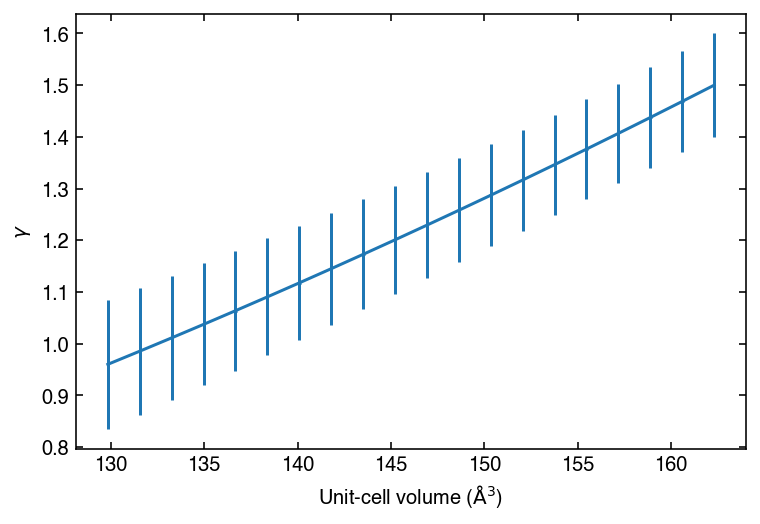

In [80]:
plt.errorbar(unp.nominal_values(v_u), unp.nominal_values(gamma), xerr=unp.std_devs(v_u), yerr=unp.std_devs(gamma))
plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('$\gamma$');

You do not need to provide uncertainties for all the parameters.  The cell below shows a case where we do not have error bars for the parameters.  In this case, we have uncertainties for volume.

In [55]:
eos.constq_grun(v_u, v0, 1.5, 2.)

array([1.5+/-0.0011881986173147509,
       1.4685872576177283+/-0.001480984847656116,
       1.4375069252077564+/-0.0015632535827655935,
       1.406759002770083+/-0.0010634024219205829,
       1.3763434903047091+/-0.0015489220663381473,
       1.3462603878116342+/-0.0006057475665177387,
       1.3165096952908588+/-0.0006963422213391754,
       1.287091412742382+/-0.0015888830460063178,
       1.2580055401662051+/-0.00033403814291158604,
       1.2292520775623266+/-0.0009842425134336582,
       1.200831024930748+/-0.00026226825096452874,
       1.1727423822714682+/-0.001352527475859915,
       1.1449861495844877+/-0.00043208305470082296,
       1.1175623268698058+/-0.0012065543341884843,
       1.0904709141274238+/-0.0008881490477826652,
       1.0637119113573406+/-0.0012794248850583607,
       1.0372853185595567+/-7.111360381730483e-05,
       1.0111911357340722+/-0.00019566602735958201,
       0.9854293628808866+/-0.0005271896234247189,
       0.9599999999999999+/-0.00097666539774030

# 3. Calculate Debye temperature and thermal pressure

You can get the Debye temperatures with error bars.

In [60]:
help(eos.constq_debyetemp)

Help on function constq_debyetemp in module pytheos.eqn_therm_constq:

constq_debyetemp(v, v0, gamma0, q, theta0)
    calculate Debye temperature for constant q
    
    :param v: unit-cell volume in A^3
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Gruneisen parameter
    :param theta0: Debye temperature at 1 bar
    :return: Debye temperature in K



In [64]:
eos.constq_debyetemp(v_u, v0, 1.5, 2., 1000.)

array([1000.0+/-0.5940993086573755, 1015.8303645504885+/-0.752214688844131,
       1031.7398349865637+/-0.8064354967623638,
       1047.7243207919184+/-0.557076290117612,
       1063.7796300436687+/-0.8238558713478346,
       1079.901470649432+/-0.3270738439624103,
       1096.0854516873335+/-0.3816252891027556,
       1112.327084849175+/-0.8836788233652426,
       1128.6217859868752+/-0.18850136272030668,
       1144.964876762185+/-0.5634615540488359,
       1161.351586399536+/-0.15229282465994357,
       1177.777053541791+/-0.7964879126763031,
       1194.2363282085053+/-0.2580046403635127,
       1210.7243738562106+/-0.7304023703919248,
       1227.2360695400907+/-0.5449842732832862,
       1243.7662121763+/-0.7956527215265677,
       1260.309518904035+/-0.04481257590725979,
       1276.860629546358+/-0.1249191234375954,
       1293.414109168624+/-0.34093724857241264,
       1309.9644507332475+/-0.6396984756505246], dtype=object)

You can get thermal pressures with error bars.

In [66]:
help(eos.constq_pth)

Help on function constq_pth in module pytheos.eqn_therm_constq:

constq_pth(v, temp, v0, gamma0, q, theta0, n, z, t_ref=300.0, three_r=24.943379399999998)
    calculate thermal pressure for constant q
    
    :param v: unit-cell volume in A^3
    :param temp: temperature
    :param v0: unit-cell volume in A^3 at 1 bar
    :param gamma0: Gruneisen parameter at 1 bar
    :param q: logarithmic derivative of Gruneisen parameter
    :param theta0: Debye temperature in K
    :param n: number of atoms in a formula unit
    :param z: number of formula unit in a unit cell
    :param t_ref: reference temperature
    :param three_r: 3R in case adjustment is needed
    :return: thermal pressure in GPa



In [75]:
p_th = eos.constq_pth(v_u, unp.uarray(np.ones_like(v)*2000., np.ones_like(v)*100), v0, 1.5, 2., 1000., 5, 4)
p_th

array([12.070619165469735+/-0.7561457916409943,
       11.917512369564442+/-0.7479030203016729,
       11.764621139966481+/-0.7396526199839695,
       11.611966188562544+/-0.7313765047898714,
       11.459568259995653+/-0.7231450954875072,
       11.307448093764947+/-0.7148565125861069,
       11.155626386256875+/-0.7066069797990264,
       11.004123752837431+/-0.6983958955673504,
       10.852960690132983+/-0.6901009994108007,
       10.702157538623986+/-0.681871753368954,
       10.55173444567231+/-0.6736089265117807,
       10.40171132909803+/-0.6654049640023503,
       10.25210784141702+/-0.6571301697024137,
       10.102943334844497+/-0.6489230820549273,
       9.954236827163966+/-0.6406751237472327,
       9.80600696855425+/-0.6324667819769547,
       9.658272009460562+/-0.6242008901950187,
       9.511049769588395+/-0.6159798358088564,
       9.364357608091542+/-0.6077686797680113,
       9.21821239501829+/-0.5995746302073034], dtype=object)

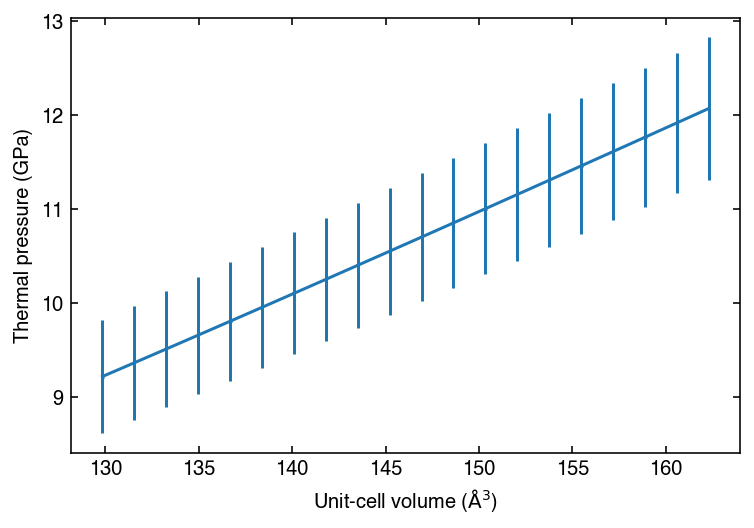

In [79]:
plt.errorbar(unp.nominal_values(v_u), unp.nominal_values(p_th),
            xerr=unp.std_devs(v_u), yerr=unp.std_devs(p_th))
plt.xlabel('Unit-cell volume ($\mathrm{\AA}^3$)'); plt.ylabel('Thermal pressure (GPa)');